## **DATA ANALYSIS PYTHON PROJECT-BLINKIT ANALYSIS** 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
 df=pd.read_csv('BlinkIt Grocery Data.csv')

In [37]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [38]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [39]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [40]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

In [41]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [42]:
df.shape

(8523, 12)

In [43]:
df.size

102276

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Data Cleaning

To clean the item fat content

In [45]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [46]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat',
                                                       'low fat':'Low Fat',
                                                       'reg':'Regular'})

In [47]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

Business Requirements

In [48]:
# Total Sales
total_sales=df['Sales'].sum()

#Average Salles
avg_sales=df['Sales'].mean()

#No of items sold
no_of_items_sold=df['Sales'].count()

#averge rating
avg_rating=df['Rating'].mean()

print(f"Total Sales:{total_sales:,.1f}")
print(f"Average Sales:{avg_sales:,.1f}")
print(f"Total Items sold:{no_of_items_sold:,.1f}")
print(f"Average Rating:{avg_rating:,.1f}")

Total Sales:1,201,681.5
Average Sales:141.0
Total Items sold:8,523.0
Average Rating:4.0


Charts Requirements

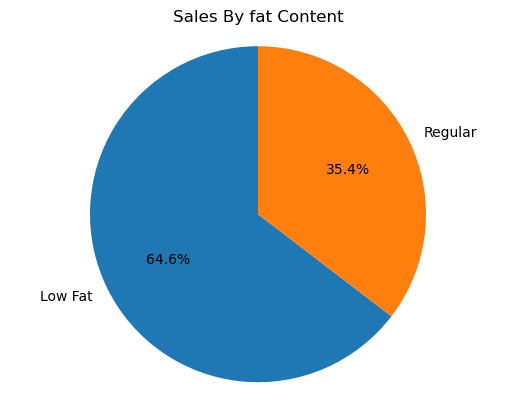

In [49]:
# Total Sales by fat content

sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,
        autopct='%.1f%%',
        startangle=90
       )
plt.title("Sales By fat Content")
plt.axis('equal')
plt.show()

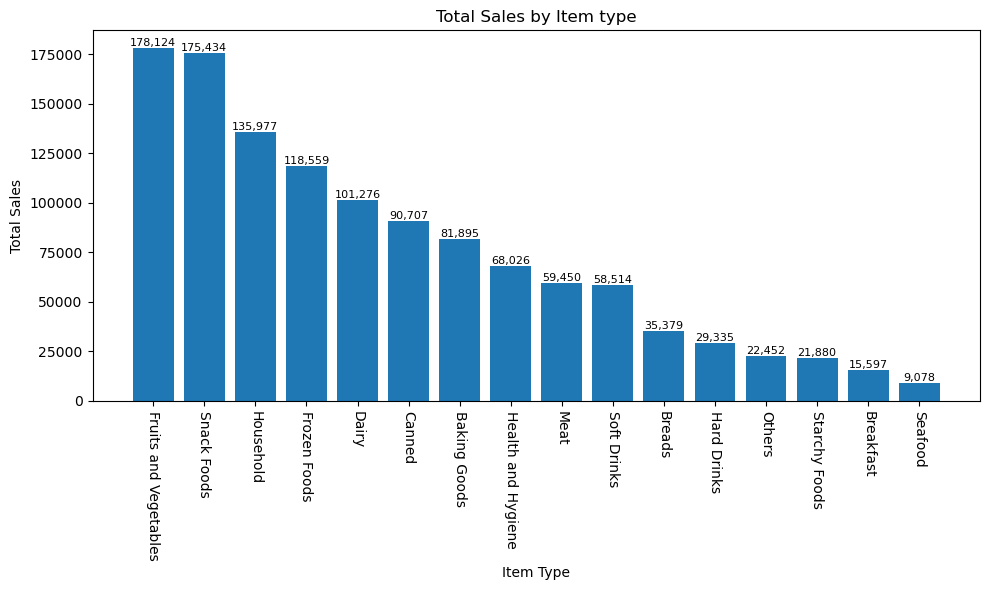

In [50]:
# Total Sales By Item Type

sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title("Total Sales by Item type")

for bar in bars:
    plt.text(bar.get_x()  + bar.get_width()/2,bar.get_height(),
             f'{bar.get_height():,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

['Regular', 'Low Fat']


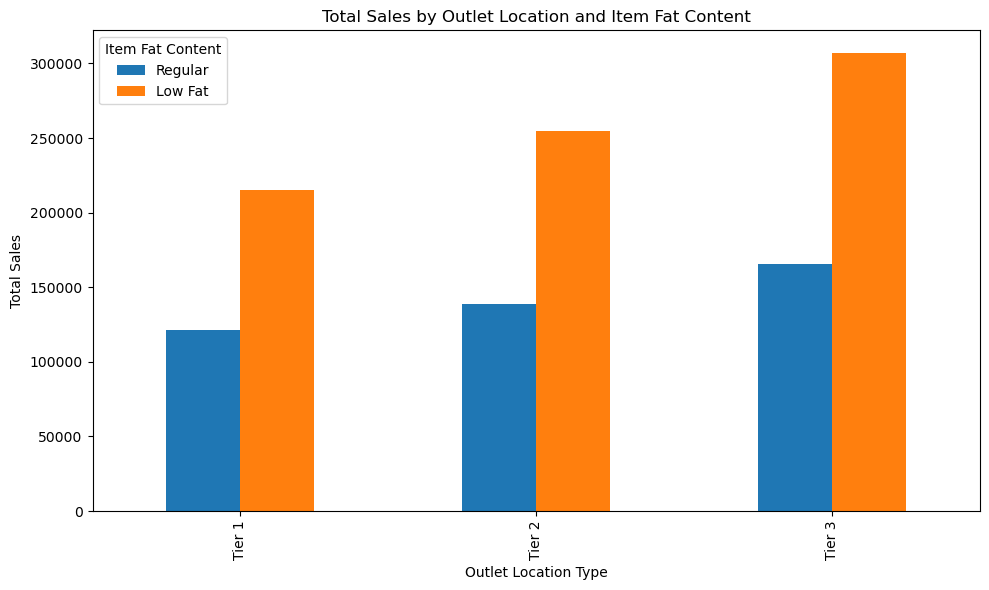

In [54]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack(fill_value=0)

# Reorder columns safely (if both exist)
expected_cols = ['Regular', 'Low Fat']
available_cols = [c for c in expected_cols if c in grouped.columns]
print(available_cols)
grouped = grouped[available_cols]

# Plot
ax = grouped.plot(kind='bar', figsize=(10, 6), title='Total Sales by Outlet Location and Item Fat Content')

plt.xlabel("Outlet Location Type")
plt.ylabel("Total Sales")
plt.legend(title="Item Fat Content")
plt.tight_layout()
plt.show()

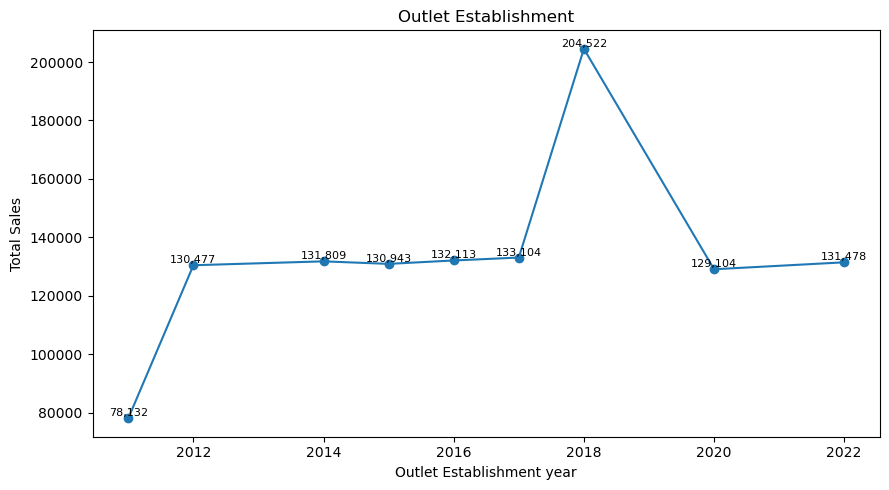

In [56]:
# Total sales by outlet establishment

sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index,sales_by_year.values,marker='o',linestyle='-')

plt.xlabel("Outlet Establishment year")
plt.ylabel("Total Sales")
plt.title('Outlet Establishment')

for x,y in zip(sales_by_year.index,sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()


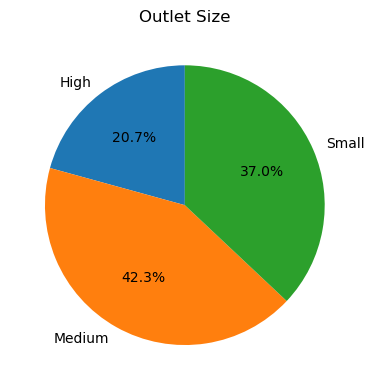

In [58]:
# Sales By Outlet Size

sales_by_outlet_size=df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_outlet_size,labels=sales_by_outlet_size.index,autopct='%1.1f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

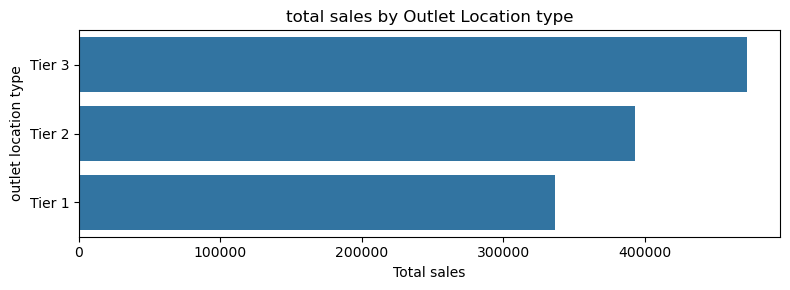

In [59]:
# Sales By outlet Location

sales_outlet=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_outlet=sales_outlet.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_outlet)

plt.xlabel("Total sales")
plt.ylabel("outlet location type")
plt.title('total sales by Outlet Location type')

plt.tight_layout()
plt.show()